# Regression

* 회귀분석은 분류 (예: logistic regression) 또는 예측에 사용.
* 선형회귀분석의 확장 (참조 ISLR 6장)
* 선형회귀모델은 OLS를 사용하여 만들어짐. 즉 예측값과 실제값 차이의 제곱이 최소화되도록 모델을 만듦.
* 변수가 증가할수록 overfitting (bias는 감소하지만, variance는 증가)
* shrinkage 방식으로 모델의 variance를 줄이고, 정확성을 향상

## OLS의 대안

* subset selection
    * best subset selection
        * null 모델에서 시작, 모든 속성의 조합에서 RSS가 가장 적은 모델을 선택함.
        * 속성이 10개라면 1024개 모델 ($2^{10}$). 속성이 40개 이상이면 계산이 거의 불가능 ($2^{40}$)
    * stepwise subset selection - best subset과 달리 변수를 하나씩 조정.
        * forward selection: 후보변수 없이 null model에서 시작하여, 하나씩 후보변수를 추가 
        * backward selection: 모든 후보변수를 넣고 full model에서 시작하고, 하나씩 제거
* shrinkage (regularization) - OLS weights를 줄이는 방식 (0까지 줄이면 속성 제거 효과)
    * ridge
    * lasso
* dimension reduction
    * PCA

## some vector differentiation

* differentiation of vector transpose
* identity matrix
 $AA^{-1}=A^{-1}*A=1$


* scalar alpha is given by the quadratic form
    $\alpha = x^T A x$
* $\alpha = \sum_{j=1}^n \sum_{i=1}^n \alpha_{ij}x_ix_j$
* 위를 미분하면 $\frac{\partial \alpha}{\partial x} =
    \sum_{j=1}^n \alpha_{kj}x_j + \sum_{i=1}^n \alpha_{ik}x_i =
    x^TA^T + x^TA=x^T(A^T + A)$

In [3]:
# differentiation
import sympy as sp
x,y,w=sp.symbols('x y w')

f=(y-x*w)**2
fdiff=sp.diff(f,w)
exp=sp.solve(fdiff,w)
print "f={0} fdiff={1} exp={2}".format(f,fdiff,exp)

# differentiation of vector transpose
a=sp.Matrix([[x**2,x],[x**2,y]])
print a.diff(x)
print a.T.diff(x)==a.diff(x).T #TRUE
# Matrix inverse
v2=sp.Matrix([[1,2],[3,4]])
print v2.inv()*v2 #identity matrix

# np.eye = identity
import numpy as np
print np.eye(3) == np.identity(3)

# matrix inverse
A=np.mat([[2,3],[4,5]])
print "A={0} A.I={1}".format(A,A.I) #([[-2.5, 1.5], [ 2. , -1. ]])
left=1./(2*5-3*4)
right=np.array([5,-3,-4,2])
print left*right #array([-2.5,  1.5,  2. , -1. ])


f=(-w*x + y)**2 fdiff=-2*x*(-w*x + y) exp=[y/x]
Matrix([[2*x, 1], [2*x, 0]])
True
Matrix([[1, 0], [0, 1]])
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]
A=[[2 3]
 [4 5]] A.I=[[-2.5  1.5]
 [ 2.  -1. ]]
[-2.5  1.5  2.  -1. ]


## 데이터 읽기

In [11]:
import os
import pandas as pd
import numpy as np

dir=os.getenv('HOME')+'/Code/git/else/machinelearninginaction/Ch08'
os.chdir(dir)
ex0=dir+'/ex0.txt'
abalone=dir+'/abalone.txt'


In [12]:
## 1. data read
# 1.1 pandas
import pandas as pd
data=pd.read_csv(ex0,header=None,sep='\s+')
data.columns=['c','x','y']
x=np.mat([data['x'],data['y']]) #(2,200)

# 1.2 textbook
import regression
xArr,yArr=regression.loadDataSet(ex0)
x=np.mat(xArr) #(200,2)
y=np.mat(yArr) #(1,200)

## solving weights

* x: 입력데이터 $\in \mathbb{R}^{m \times n}$
* y: output variables
* $(x_1,y_1),(x_2,y_2) \ldots,(x_n,y_n)$: 학습데이터
* $y = \beta_0 + \beta_1x_1 + \ldots + \beta_nx_n$
* $y = \beta_0 + \sum_{j=1}^n \beta_j x_j$
* 이 식에서 $\beta_0$는 제거 (있어도 최소화에 영향 무) $\beta$를 w로, y=wx
* $\hat{w} = argmin_{w} (y-wx)^2$ 오류를 최소화 하는 $\hat{w}$를 찾음.

$\hat{w}$ 최소해를 구하면:
* e = sum of squared residuals
* $e.T \times e = (y-wx)^T (y-wx) = y^Ty -2w(x^Ty)^T+w^Tx^Twx$
* 위를 미분하면 $\frac{\partial f}{\partial w} =
    -2(x^Ty) + (x^Tx+(x^Tx)^T)w=-2(x^Ty)+2wx^Tx$
* 미분 값을 0으로 놓고 풀면, $-2x^Ty + 2\hat{w}x^Tx = 0$
* $\hat{w} = (X^T X) ^{-1} X^T y$
    * inverse matrix: $AA^{-1}=I$인 $A^{-1}$가 존재하면 A는 invertible이라고 함.
    * $Ax = b$인 경우, 양변을 $A^{-1}$로 곱하면
    * $A^{-1}Ax=bA^{-1}$ 여기서 $AA^{-1}=1$이므로 
    * $x=bA^{-1}$

예제
* x데이터 형식 - 첫째 열 x0, 둘째 열 x1
* 따라서 ws를 구하면 w0, w1을 반환
* y=3.0 + 1.7x

In [13]:
# simple example
X=sp.Matrix([[1,2],[1,4],[1,6]])
Y=sp.Matrix([3,6,7])
xTx=X.T*X
xTxI=xTx.inv()  #inversible as xTx.det() (3*56 - 12*12) != 0
xTyT=X.T*Y
print "weights=",xTxI*xTyT #y=1.33+1.00x1+e

# Listing 8.1 standRegres
ws=regression.standRegres(xArr,yArr) #[[ 3.00774324] [ 1.69532264]]
xTyT=x.T*y.T #(2,1) <-- x.T(2,200) * y.T(200,1)
xTx=x.T*x #(2,2) <-- x.T(2,200) * x(200,2)
xTxI=xTx.I #np.linalg.inv(np.dot(x.T,x))
ws=xTxI * xTyT
yhat=x*ws #(200,1) <-- (200,2) * (2,1)
print "xTx={0}\nxTx.I={1}\nxTyT={2}\nws={3}".format(xTx,xTx.I,xTyT,ws)

# standard regression using numpy
print "using np linear algebra",np.linalg.lstsq(x,yArr)

weights= Matrix([[4/3], [1]])
xTx=[[ 200.           97.6638    ]
 [  97.6638       64.76838373]]
xTx.I=[[ 0.0189633  -0.02859463]
 [-0.02859463  0.05855728]]
xTyT=[[ 767.1203    ]
 [ 403.55094194]]
ws=[[ 3.00774324]
 [ 1.69532264]]
using np linear algebra (array([ 3.00774324,  1.69532264]), array([ 1.35524908]), 2, array([ 15.84835002,   3.68757174]))
A=[[2 3]
 [4 5]] A.I=[[-2.5  1.5]
 [ 2.  -1. ]]
[-2.5  1.5  2.  -1. ]


In [14]:
# 8.3 rssError
def rss(y,yhat):
    resid=y-yhat
    rss=np.square(resid).sum()
    return rss
print 'rss=',rss(y.T,yhat)
# same results with sklearn mean_squared_error
from sklearn.metrics import mean_squared_error
print mean_squared_error(y.T,yhat)
print rss(y.T,yhat)/len(y.T)


A=[[2 3]
 [4 5]] A.I=[[-2.5  1.5]
 [ 2.  -1. ]]
[-2.5  1.5  2.  -1. ]
rss= 1.35524908168
0.00677624540841
0.00677624540841


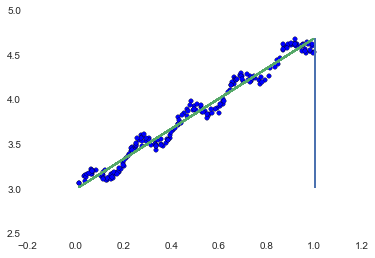

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(x[:,1],y) #(200,1) (1,200) --> flatten in the textbook
ax.plot(x,yhat)

## Local Regression

* 오류의 평균을 최소화하게 되면서, 이로 인한 편차를 줄이기 위한 방법
* locally weighted linear regression - giving more weight to points near the points and less weight to points further away
* LOESS (LOcal regrESSion), originally proposed by Cleveland (1979) 
* non parametric regression


* $\hat{w} = (X^T W X) ^{-1} X^T W y$
    * 표준회귀분석 ($\hat{w} = (X^T X) ^{-1} X^T y$)에 W를 반영
    * W는 square matrix, 가까운 데이터에 가중치를 더해줌
* Gaussian kernel
    * $w(i,j) = exp \frac{|x_i-x|}{-2\sigma^2}$
    * $\sigma$ 근접 데이터에게 할당되는 비율을 결정하는 계수
        * 범위 0~1
        * 1이면 근접데이터 뿐만 아니라 모든 데이터가 포함 (OLS와 동일)
        * 0.01이면 근접데이터에만 가중치 할당. 
    * $x_i - x$ 작으면 지수의 승수는 0에 가까워지고 $w(i,j) \approx 1$
    * $x_i - x$ 크면 지수의 승수는 큰 음수에 가까워지고 $w(i,j) \approx 0$


In [16]:
# locally weighted regression
# Listing 8.2
def gaussianKernel(xtest, x, k=1.0):
    diff = xtest - x
    return np.exp(diff * diff.T / (-2.0 * k**2))
def localWeights(xtest, x, k=1.0):
    xmat = np.mat(x)
    rows = xmat.shape[0]
    # Create diagonal weight matrix from identity matrix
    weights = np.mat(np.eye(rows))
    for i in xrange(rows):
        weights[i, i] = gaussianKernel(xtest, xmat[i,:], k)
    return weights
# singular matrix error (k=0.001)
def localRegress(xt,x,k=1.0):
    rows=np.shape(xt)[0]
    yhat=np.zeros(rows)
    for i in xrange(rows):
        lws=localWeights(xt[i],x,k) #(200,200)
        xTwx=x.T*lws*x # (2,2) <- (2,200)*(200,200)*(200,2)
        if np.linalg.det(xTwx)==0.0:
            print "singular matrix"
            return
        ws=xTwx.I*x.T*lws*y.T #(200,1)??
        yhat[i]=xt[i]*ws
        # print "i={0} yhat={1} xt={2}".format(i,yhat[i],xt[i])
    return yhat

yhatLocal=localRegress(x,x)

print yhatLocal

[ 3.12204471  3.73284336  4.69692033  4.25997574  4.67205815  3.89979584
  3.64981617  3.06462993  3.23234485  3.24169633  3.42741618  4.10707034
  4.24787613  3.40879727  4.65288661  4.03784328  3.61542726  3.25787329
  4.08932965  3.39783761  3.12629106  3.12106493  4.57784181  4.22499774
  3.03329674  3.57546269  3.07586196  3.36765021  4.05435451  3.92530073
  3.08411123  3.22212205  3.95125595  4.53636662  4.63368585  3.47279924
  3.67613549  4.48770772  3.70250157  4.54964976  3.29004763  4.13549978
  3.45441958  3.39926586  3.9452161   3.08816389  3.62751621  3.84688831
  3.84428111  4.35125277  4.31315478  3.43422203  3.31571015  4.3785447
  3.57384393  3.58150337  3.7748906   4.18601319  4.00967978  3.52940957
  3.25875168  4.19859322  4.23146773  4.13867447  3.21901745  4.0561676
  3.65354789  3.66128122  4.325913    3.2040255   3.20300481  4.13294306
  3.43941808  4.69379223  3.50821162  4.6235812   3.5279148   3.47737983
  3.48050144  3.30514953  3.27235     4.25119686  4.4

## shrinkage methods

### ridge

* ridge regression는 OLS + L2 penalty. OLS와 동일하지만 L2 penalty를 더함.
* Andre Tikhonov

* Lagrange multiplier 이용:
    f = $(y-wx)^2 + \lambda w^2$ 오류를 최소화 하는 w를 찾음.
    * the first term: RSS (OLS)
    * the second term: shrinkage penalty (L2 norm (least squared error))
    * as $\lambda \rightarrow 0$, $w_{ridge} \rightarrow w_{ols}$
        i.e., no penalty
    * as $\lambda \rightarrow \infty$, $w_{ridge} \rightarrow 0$
        i.e., penalty increases
* 위를 미분하면 $\frac{\partial f}{\partial w} =
    -2(x^Tx + \lambda I)w -2x^Ty$
    * $\hat{w} = (X^T X + \lambda I) ^{-1} X^T y$
    * Identity matrix: n × n square matrix with ones on the main diagonal and zeros elsewhere (np.eye와 동일)

* Ridge regression의 단점
    * 최종 모델에 모든 속성을 포함하게 됨.
    * $\lambda$ 값이 증가하면 w를 줄일 수 있지만 0으로 만들지 못함
        (즉, 속성 제거 불가능) (unless $\lambda = \infty$)

In [19]:

def ridgeGradientDescent(x, y, alpha, iters, L):
    x=np.matrix(x)
    y=np.matrix(y).T
    m, n = np.shape(x)
    beta = np.matrix(np.ones(n)).transpose()
    XT = x.transpose()
    for i in range(0, iters):
        yhat = np.dot(x, beta)
        residuals = yhat - y
        MSE = (residuals.transpose()*residuals)/len(x)
        print "iteration:", i, "MSE:", MSE
        ols_gradient = np.dot(XT, residuals) / m
        beta = beta - alpha * (ols_gradient + (L/m)*beta)
    return beta

def ridgeWeights(xMat,yMat,lam=0.2):
    xTx = xMat.T*xMat
    xTxlamI = xTx + np.eye(np.shape(xMat)[1])*lam
    if linalg.det(xTxlamI) == 0.0:
        print "This matrix is singular, cannot do inverse"
        return
    ws = xTxlamI.I * (xMat.T*yMat)
    return ws


### lasso

* ridge regression은 속성을 제거하지 못하지만, lasso는 속성을 제거할 수 있슴.
* Ridge regression과의 차이는 L1 norm penalty를 더함 (least absolute error)
* Minimize $\sum (y-\hat{y})^2 \text{ s.t. }\sum_{j=1}^p w_j \le t$
* Lagrange multiplier 이용:
    f = $(y-wx)^2 + \lambda |w|$ 오류를 최소화 하는 w를 찾음.
* $\lambda$가 증가하게 되면, w가 0이 되는 속성이 생겨남. 변수제거 효과.


## forward stagewise

* forward stagewise regression
    * 모든 변수를 포함하지 않아도 됨
    * 속성의 계수를 조금씩 증가(감소). 갱신이 많아지면 비효율적.
 
* initialize intercept and all weights $w_0, w_1, \cdots ,w_p = 0$
* for niter
    * find the variable $x_j$ most correlated with residuals
    * update $w_j \leftarrow w_j + \epsilon \cdot sign<w,x_j>$
    * $w \leftarrow w$ if rss is lower 


In [18]:
def stageWise(x,y,eps=0.01,niter=100):
    xmat=np.mat(x)
    ymat=np.mat(y)
    ym=ymat.T-np.mean(ymat.T,0)
    # standardize (z value)
    xm=(xmat-np.mean(xmat,0))/np.var(xmat,0)
    r,c=np.shape(xm)
    ws=np.zeros((c,1))
    wsTest=ws.copy()
    wsMax=ws.copy()
    wsAll=ws.copy()
    for i in range(niter):
        lowestErr=np.inf
        # find xj with the least error
        for j in range(c):
            for sign in [-1,1]:
                # compute new w
                wsTest=ws.copy()
                wsTest[j]+=eps*sign
                yTest=xm*wsTest #(r,1) = (r,c) (c,1)
                rssE=rss(ym,yTest)
                # find least error
                if rssE < lowestErr:
                    lowestErr=rssE
                    wsMax=wsTest
        # update w
        ws=wsMax.copy()
        wsAll=np.hstack((wsAll,ws))
    return wsAll

eps=0.01
abX,abY=regression.loadDataSet(abalone)
#[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
stageWs=stageWise(abX,abY,0.01,200)

print stageWs[:,200]

[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]


## bias variance tradeoff

* small variance and high bias underfit the truth target.
* high variance and low bias overfit the truth target

* $E[(y - \hat{y})^2] = Bias^2 + Var + \sigma^2$
* $Bias = E[\hat{y}] - y$ 기대예측값과 실제값의 차이
* $Var = E[(\hat{y} - E[\hat{y}])^2]$ how much $\hat{y}$ move around its mean

* 모델의 정확성을 높일수록, bias는 감소, variance는 증가.


# data
* This data frame contains the responses of 237 Statistics I students at the University of Adelaide to
a number of questions.
* Sex The sex of the student. (Factor with levels "Male" and "Female".)
* Wr.Hnd span (distance from tip of thumb to tip of little finger of spread hand) of writing hand, in
centimetres.
* NW.Hnd span of non-writing hand.
* W.Hnd writing hand of student. (Factor, with levels "Left" and "Right".)
* Fold “Fold your arms! Which is on top” (Factor, with levels "R on L", "L on R", "Neither".)
* Pulse pulse rate of student (beats per minute).
* Clap ‘Clap your hands! Which hand is on top?’ (Factor, with levels "Right", "Left", "Neither".)
* Exer how often the student exercises. (Factor, with levels "Freq" (frequently), "Some", "None".)
* Smoke how much the student smokes. (Factor, levels "Heavy", "Regul" (regularly), "Occas" (occasionally),
"Never".)
* Height height of the student in centimetres.
* M.I whether the student expressed height in imperial (feet/inches) or metric (centimetres/metres)
units. (Factor, levels "Metric", "Imperial".)
* Age age of the student in years

In [22]:
mass.data.head()

,Sex,Wr.Hnd,NW.Hnd,W.Hnd,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
0,Female,18.5,18.0,Right,R on L,92,Left,Some,Never,173.0,Metric,18.250
1,Male,19.5,20.5,Left,R on L,104,Left,None,Regul,177.8,Imperial,17.583
2,Male,18.0,13.3,Right,L on R,87,Neither,None,Occas,NaN,NaN,16.917
3,Male,18.8,18.9,Right,R on L,NaN,Neither,None,Never,160.0,Metric,20.333
4,Male,20.0,20.0,Right,Neither,35,Right,Some,Never,165.0,Metric,23.667


In [23]:
type(mass.data)

pandas.core.frame.DataFrame

In [24]:
mass.data.groupby('Sex').mean()

,Wr.Hnd,NW.Hnd,Pulse,Height,Age
Sex,,,,,
Female,17.595763,17.45678,75.126316,165.686667,20.407534
Male,19.741880,19.71453,73.197917,178.826038,20.331958


In [25]:
mass.data.groupby('Sex').count()

,Sex,Wr.Hnd,NW.Hnd,W.Hnd,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
Sex,,,,,,,,,,,,
Female,118,118,118,117,118,95,118,118,118,102,102,118
Male,118,117,117,118,118,96,117,118,117,106,106,118


In [26]:
mass.data.columns
mass.data.columns=['sex','wr','nw','w','fold','pulse','clap','exer','smoke','height','mi','age']

In [27]:
mass.data.columns

Index([u'sex', u'wr', u'nw', u'w', u'fold', u'pulse', u'clap', u'exer', u'smoke', u'height', u'mi', u'age'], dtype='object')

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/numpy/core/_methods.py:55: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


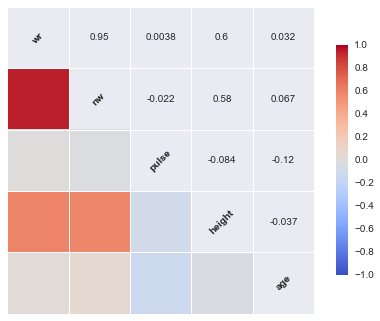

In [28]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
sns.corrplot(mass.data)
plt.show()

In [29]:
formula='sex ~ wr+nw+w+pulse+height+age'
import statsmodels.formula.api as smf
model=smf.glm(formula,data=mass.data,family=sm.families.Binomial()).fit()
print (model.summary())

                      Generalized Linear Model Regression Results                       
Dep. Variable:     ['sex[Female]', 'sex[Male]']   No. Observations:                  168
Model:                                      GLM   Df Residuals:                      161
Model Family:                          Binomial   Df Model:                            6
Link Function:                            logit   Scale:                             1.0
Method:                                    IRLS   Log-Likelihood:                -52.236
Date:                          Thu, 16 Apr 2015   Deviance:                       104.47
Time:                                  16:07:59   Pearson chi2:                     646.
No. Iterations:                               7                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     49.5650      8.052      6.1

In [30]:
formula2='sex ~ nw+height'
model2=smf.glm(formula2,data=mass.data,family=sm.families.Binomial()).fit()
print (model2.summary())

                      Generalized Linear Model Regression Results                       
Dep. Variable:     ['sex[Female]', 'sex[Male]']   No. Observations:                  207
Model:                                      GLM   Df Residuals:                      204
Model Family:                          Binomial   Df Model:                            2
Link Function:                            logit   Scale:                             1.0
Method:                                    IRLS   Log-Likelihood:                -67.329
Date:                          Thu, 16 Apr 2015   Deviance:                       134.66
Time:                                  16:08:03   Pearson chi2:                     468.
No. Iterations:                               7                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     49.1014      6.919      7.0

In [31]:
formula3='height ~ 1+sex'
model3=smf.ols(formula3,data=mass.data).fit()
print model3.summary()

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     165.1
Date:                Thu, 16 Apr 2015   Prob (F-statistic):           3.86e-28
Time:                        16:08:05   Log-Likelihood:                -709.66
No. Observations:                 208   AIC:                             1423.
Df Residuals:                     206   BIC:                             1430.
Df Model:                           1                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     165.6867      0.730    226.978      0.000       164.248   167.126
sex[T.Male]    13.1394      1.023     12.850     

$$ y=\beta_0 + \beta_1 \times x $$

$$ \hat{y} = \hat{\beta_0} + \hat{\beta_1} \times x $$


* regression 결과에서 Intercept(165.686) + Male(13.139)는 평균과 동일
* regression과 anova는 같은 결과를 보여줌.

In [32]:
anova_model=smf.ols(formula3,data=mass.data).fit()
from statsmodels.stats.anova import anova_lm
anova_lm(anova_model)

,df,sum_sq,mean_sq,F,PR(>F)
sex,1,8974.119690,8974.119690,165.114466,3.861758e-28
Residual,206,11196.285203,54.350899,NaN,NaN
